<div align="center">
<h1>Proyectos predición de Dogecoin usando ML</a></h1>

<b>Dogecoin</b> fue la razón reciente de la caida de los precios de las crypto monedas ya que esta tenia una oferta muy grande a precios bajos. El precio de esta criptomoneda aumento bastante, esto ocurre ya que Elon Musk empezarón a hablar de esta moneda. Con un par de Tweets aumento la popularidad muy grande de esta criptomoneda. Se ha capitalizado bastante pero esta criptomoneda se creo en forma de burla o en alusión a un meme. Entonces, <b>Dogecoin</b> se ha especulado de que sea una burbuja y que al final pueda que estalle y sus precios caigan. 

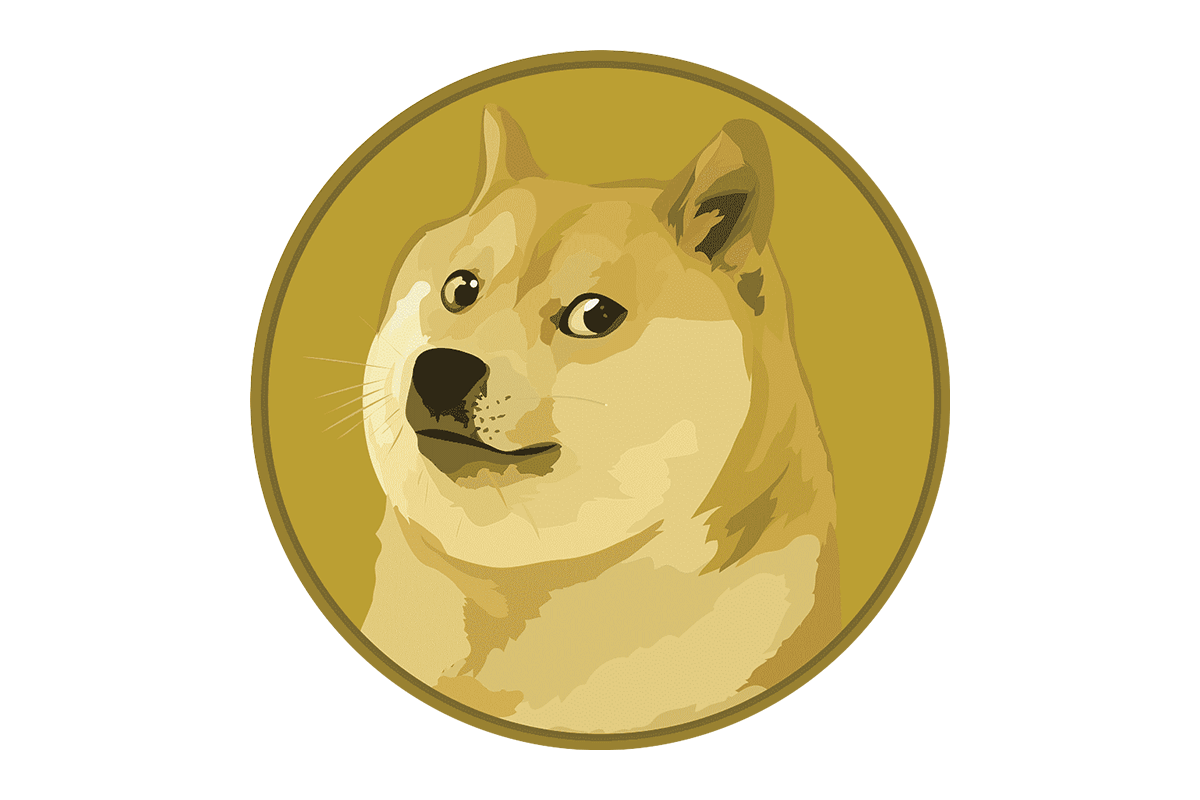

<h2> Predicción del precio de Dogecoin
    

La predicción de una criptomoneda es un problema regresivo en el machine learning. Bitcoin es uno de los ejemplos más conocidos de las criptomonedas, pero esta se vio una gran caida de precios debido a Dogecoin. Vamos a ver ahora si el precio de Dogecoin pueda que suba o baje.

Hay muchos alcaces para el proceso de machine learning que podemos usar para la tarea de la predicción del precio de Dogecoin. Se puede entrenar un modelo de machine learning o podemos unar una herramienta disponmibles para esta tarea como el Facebook Prophet Model. En la sección siguiente utilizaremos la librería <A HREF="https://github.com/winedarksea/AutoTS"> Auto TS </A> de Python para la tarea de predicción de precio con machine learning. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [2]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [3]:
data = yf.download('DOGE-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date      Open      High       Low     Close  Adj Close    Volume
0 2020-11-16  0.002775  0.003009  0.002757  0.002886   0.002886  52063283
1 2020-11-17  0.002908  0.002976  0.002886  0.002936   0.002936  46631464
2 2020-11-18  0.002936  0.002999  0.002855  0.002909   0.002909  49460064
3 2020-11-19  0.002909  0.002960  0.002868  0.002911   0.002911  40330643
4 2020-11-20  0.002911  0.003011  0.002908  0.002984   0.002984  57656465


In [4]:
data.shape

(730, 7)

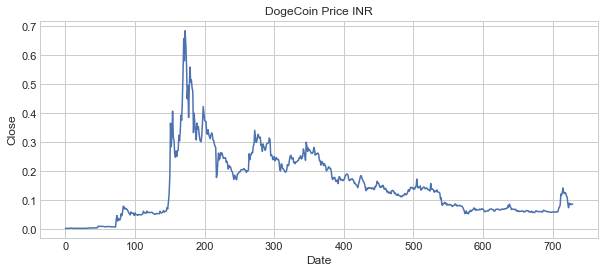

In [5]:
sns.set()
plt.style.use('seaborn-whitegrid')
data.dropna()
plt.figure(figsize=(10, 4))
plt.title("DogeCoin Price INR")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

In [7]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Dogecoin Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

Ahora utilizaremos la libreria de Python para entrenal el modelo de machine learning y predecir los precios del Dogecoin.

In [8]:
!pip install autots 

In [9]:
from autots import AutoTS
model = AutoTS(forecast_length=15, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast
print("DogeCoin Price Prediction")
print(forecast)

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 14 with model GLM in generation 0 of 10
Model Number: 15 with model GLS in generation 0 of 10
Model Number: 16 with model GLS in generation 0 of 10
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 17: GluonTS
Model Number: 18 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 18: GluonTS
Model Number: 19 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 19: GluonTS
Model Number: 20 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 20: GluonTS
Model Number: 21 with model GluonTS in generation 0 of

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 38: FBProphet
Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (E:\\Anaconda\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 49: ARDL
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 with model UnivariateMotif in generation 0 of 10
Model Number: 54 with model SectionalMotif in generation 0 of 10
Model Number: 55 with model SectionalMotif in generation 0 of 10
Model Number: 56 with model MultivariateRegr

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 62 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 65: LastValueNaive
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Model Number: 70 with model ETS in generation 0 of 10
Model Number: 71 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No mo

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 80 with model MultivariateRegression in generation 0 of 10
Model Number: 81 with model UnivariateMotif in generation 0 of 10
Model Number: 82 with model MultivariateMotif in generation 0 of 10
Model Number: 83 with model SectionalMotif in generation 0 of 10
Model Number: 84 with model NVAR in generation 0 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'PowerTransformer', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 84: NVAR
Model Number: 85 with model Theta in generation 0 of 10
Model Number: 86 with model ARDL in generation 0 of 10
Template Eval Error: Im

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning:

invalid value encountered in log



Model Number: 109 with model AverageValueNaive in generation 0 of 10
Model Number: 110 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 110: SectionalMotif
Model Number: 111 with model SeasonalityMotif in generation 0 of 10
Model Number: 112 with model GLM in generation 0 of 10
Model Number: 113 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 113: VECM
Model Number: 114 with model UnobservedComponents in generation 0 of 10
Model Number: 115 with model SeasonalityMotif in generation 0 of 10
Model Number: 116 with model WindowRegression in generation 0 of 10
Model Number: 117 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 117: ARCH
Model Number: 118 with model MetricMotif in generation 0 of 10
Model Number: 119 with model GL

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.27273e-25): result may not be accurate.



Model Number: 143 with model Theta in generation 0 of 10
Model Number: 144 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 144: MultivariateRegression
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model Theta in generation 0 of 10
Model Number: 147 with model ETS in generation 0 of 10
Model Number: 148 with model MultivariateMotif in generation 0 of 10
Model Number: 149 with model ConstantNaive in generation 0 of 10
Model Number: 150 with model SeasonalNaive in generation 0 of 10
Model Number: 151 with model SectionalMotif in generation 0 of 10
Model Number: 152 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 152: GLM
Model Number: 153 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be inst

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning:

overflow encountered in exp

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning:

invalid value encountered in multiply

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply

E:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 158 with model UnobservedComponents in generation 0 of 10
Model Number: 159 with model MetricMotif in generation 0 of 10
Model Number: 160 with model UnobservedComponents in generation 0 of 10
Model Number: 161 with model SeasonalityMotif in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 163: ARCH
Model Number: 164 with model SeasonalityMotif in generation 0 of 10
Model Number: 165 with model SeasonalityMotif in generation 0 of 10
Model Number: 166 with model NVAR in generation 0 of 10
Model Number: 167 with model DatepartRegression in generation 0 of 10
Model Number: 168 with model UnobservedComponents in generation 0 of 10
Model Number: 169 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 169: ARCH
Model Number: 170 w

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 171 with model AverageValueNaive in generation 0 of 10
Model Number: 172 with model ConstantNaive in generation 0 of 10
Model Number: 173 with model LastValueNaive in generation 0 of 10
Model Number: 174 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 174: UnivariateRegression
Model Number: 175 with model MetricMotif in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 175: MetricMotif
Model Number: 176 with model MultivariateRegression in generation 0 of 10


E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning:

Degrees of freedom <= 0 for slice

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 770 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.6s finished
E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning:

Degrees of freedom <= 0 for slice

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 176: MultivariateRegression
Model Number: 177 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 177: GLM
Model Number: 178 with model ConstantNaive in generation 0 of 10
Model Number: 179 with model MultivariateMotif in generation 0 of 10
Model Number: 180 with model SeasonalityMotif in generation 0 of 10
Model Number: 181 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 181: VECM
Model Number: 182 with model SeasonalityMotif in generation 0 of 10
Model Number: 183 with model SectionalMotif in generation 0 of 10
Model Number: 184 with model SeasonalNaive in generation 0 of 10
Model Number: 185 with model SectionalMotif in generation 0 of 10
Model Number: 186 with model SeasonalNaive in generation 0 of 10
Model

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.27273e-25): result may not be accurate.




Model Number: 220 with model Theta in generation 1 of 10
Model Number: 221 with model ARIMA in generation 1 of 10
Model Number: 222 with model MetricMotif in generation 1 of 10
Model Number: 223 with model SeasonalNaive in generation 1 of 10
Model Number: 224 with model ConstantNaive in generation 1 of 10
Model Number: 225 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 225: MultivariateRegression
Model Number: 226 with model MultivariateMotif in generation 1 of 10
Model Number: 227 with model Theta in generation 1 of 10
Model Number: 228 with model ETS in generation 1 of 10


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 229 with model UnobservedComponents in generation 1 of 10
Model Number: 230 with model UnivariateMotif in generation 1 of 10
Model Number: 231 with model SectionalMotif in generation 1 of 10
Model Number: 232 with model Theta in generation 1 of 10
Model Number: 233 with model NVAR in generation 1 of 10
Model Number: 234 with model UnobservedComponents in generation 1 of 10
Model Number: 235 with model ETS in generation 1 of 10
Model Number: 236 with model ConstantNaive in generation 1 of 10
Model Number: 237 with model AverageValueNaive in generation 1 of 10
Model Number: 238 with model DatepartRegression in generation 1 of 10
Model Number: 239 with model MultivariateMotif in generation 1 of 10
Model Number: 240 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 240: LastValueNaive
Model Number: 241 with model GLM in generation 1 of 10
Model Number: 242 with model UnivariateRegression in gener

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 297 with model SeasonalityMotif in generation 1 of 10
Model Number: 298 with model SeasonalNaive in generation 1 of 10
Model Number: 299 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 300 with model NVAR in generation 1 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 300: NVAR
Model Number: 301 with model UnivariateRegression in generation 1 of 10
Model Number: 302 with model SectionalMotif in generation 1 of 10
Model Number: 303 with model UnivariateMotif in generation 1 of 10
Model Number: 304 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 304: DatepartRegression
Model Number: 305 with model MetricMotif in generation 1 of 10
Model Number: 306 with model UnivariateMotif in generation 1 of 10
Model Number: 307 with model UnobservedComponents in generation 1 of 10


E:\Anaconda\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in double_scalars



Model Number: 308 with model SeasonalNaive in generation 1 of 10
Model Number: 309 with model NVAR in generation 1 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 309: NVAR
Model Number: 310 with model UnivariateMotif in generation 1 of 10
Model Number: 311 with model UnobservedComponents in generation 1 of 10
Model Number: 312 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 312: DatepartRegression
Model Number: 313 with model GLS in generation 1 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'AlignLastValue', '1': 'Round', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 0.7, 'first_value_only': False}, '1': {'decimals': 0, 'on_transform': False, 'on_inve

E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning:

Degrees of freedom <= 0 for slice

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 316 with model AverageValueNaive in generation 1 of 10
Model Number: 317 with model MultivariateRegression in generation 1 of 10
Model Number: 318 with model MetricMotif in generation 1 of 10
Model Number: 319 with model UnobservedComponents in generation 1 of 10
Model Number: 320 with model SeasonalityMotif in generation 1 of 10
Model Number: 321 with model MetricMotif in generation 1 of 10
Model Number: 322 with model DatepartRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 322: DatepartRegression
Model Number: 323 with model LastValueNaive in generation 1 of 10
New Generation: 2 of 10
Model Number: 324 with model DatepartRegression in generation 2 of 10
Model Number: 325 with model Theta in generation 2 of 10
Model Number: 326 with model Theta in generation 2 of 10
Model Number: 327 with model AverageValueNaive in generation 2 of 10
Model Number: 328 with model ETS in generation

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 329 with model ARIMA in generation 2 of 10
Model Number: 330 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 330: DatepartRegression
Model Number: 331 with model SeasonalNaive in generation 2 of 10
Model Number: 332 with model ARIMA in generation 2 of 10
Model Number: 333 with model ARIMA in generation 2 of 10
Model Number: 334 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 335 with model UnobservedComponents in generation 2 of 10
Model Number: 336 with model AverageValueNaive in generation 2 of 10
Model Number: 337 with model MetricMotif in generation 2 of 10
Model Number: 338 with model NVAR in generation 2 of 10
Model Number: 339 with model SectionalMotif 

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 379 with model SeasonalNaive in generation 2 of 10
Model Number: 380 with model ARIMA in generation 2 of 10


E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 381 with model SeasonalNaive in generation 2 of 10
Model Number: 382 with model SeasonalNaive in generation 2 of 10
Model Number: 383 with model SectionalMotif in generation 2 of 10
Model Number: 384 with model NVAR in generation 2 of 10
Model Number: 385 with model UnivariateMotif in generation 2 of 10
Model Number: 386 with model SeasonalityMotif in generation 2 of 10
Model Number: 387 with model NVAR in generation 2 of 10
Model Number: 388 with model UnobservedComponents in generation 2 of 10
Model Number: 389 with model LastValueNaive in generation 2 of 10
Model Number: 390 with model UnivariateMotif in generation 2 of 10
Model Number: 391 with model ARIMA in generation 2 of 10
Model Number: 392 with model Theta in generation 2 of 10
Model Number: 393 with model Theta in generation 2 of 10
Model Number: 394 with model SeasonalNaive in generation 2 of 10
Model Number: 395 with model Theta in generation 2 of 10
Model Number: 396 with model Theta in generation 2 of 10
Mo

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 403 with model SectionalMotif in generation 2 of 10
Model Number: 404 with model DatepartRegression in generation 2 of 10
Model Number: 405 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 406 with model SeasonalNaive in generation 2 of 10
Model Number: 407 with model UnivariateRegression in generation 2 of 10
Model Number: 408 with model SeasonalityMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 408: SeasonalityMotif
Model Number: 409 with model LastValueNaive in generation 2 of 10
Model Number: 410 with model UnivariateMotif in generation 2 of 10
Model Number: 411 with model GLS in generation 2 of 10
Model Number: 412 with model AverageValueNaive in generation 2 of 10
Model Number: 413 with model NVAR in generation 2 of 10
Model Number: 414 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 414: MultivariateRegression
Model Number: 415 with model MetricMotif in generation 2 of 10
Model Number: 416 with model ARIMA in generation 2 of 10
Model Number: 417 with model ARIMA in generat

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\autots\models\base.py:504: RuntimeWarning:

overflow encountered in square

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 423 with model AverageValueNaive in generation 2 of 10
Model Number: 424 with model SeasonalNaive in generation 2 of 10
Model Number: 425 with model MetricMotif in generation 2 of 10
Model Number: 426 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 427 with model ETS in generation 2 of 10
Model Number: 428 with model ETS in generation 2 of 10
Model Number: 429 with model SeasonalNaive in generation 2 of 10
Model Number: 430 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 430: DatepartRegression
Model Number: 431 with model AverageValueNaive in generation 2 of 10
Model Number: 432 with model ETS in generation 2 of 10
Model Number: 433 with model DatepartRegression in generation 2 of 10
Model Number: 434 with model Theta in generation 2 of 10
Model Number: 435 with model SectionalMotif in generation 2 of 10
Model Number: 436 with model UnobservedComponents in generation 2 of 10
Model Number: 437 with model SeasonalNaive in generation 2 of 10
Model Number: 438 with model NVAR in generation 2 of 10
Model Number: 439 with model ARIMA in generation 2 of 10
Model Number: 440 with model SectionalMotif in generation 2 of 10


E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 511 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 511: ETS
Model Number: 512 with model ARIMA in generation 3 of 10
Model Number: 513 with model ConstantNaive in generation 3 of 10
Model Number: 514 with model MultivariateRegression in generation 3 of 10
Model Number: 515 with model UnivariateRegression in generation 3 of 10
Model Number: 516 with model Theta in generation 3 of 10
Model Number: 517 with model MetricMotif in generation 3 of 10
Model Number: 518 with model ARIMA in generation 3 of 10
Model Number: 519 with model LastValueNaive in generation 3 of 10
Model Number: 520 with model SeasonalNaive in generation 3 of 10
Model Number: 521 with model NVAR in generation 3 of 10
Model Number: 522 with model DatepartRegression in generation 3 of 10
Model Number: 523 with model GLS in generation 3 of 10
Model Number: 524 with model MultivariateRegression in generation 3 of 10
Model Number: 525

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.27273e-25): result may not be accurate.



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 543: UnivariateRegression
Model Number: 544 with model MultivariateMotif in generation 3 of 10
Model Number: 545 with model ARIMA in generation 3 of 10
Model Number: 546 with model UnobservedComponents in generation 3 of 10
Model Number: 547 with model ARIMA in generation 3 of 10
Model Number: 548 with model DatepartRegression in generation 3 of 10
Model Number: 549 with model AverageValueNaive in generation 3 of 10
Model Number: 550 with model GLS in generation 3 of 10
Model Number: 551 with model UnivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 551: UnivariateMotif
Model Number: 552 with model SeasonalityMotif in generation 3 of 10
Model Number: 553 with model SeasonalityMotif in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 554 with model UnivariateRegression in generation 3 of 10
Model Number: 555 with model WindowRegression in generation 3 of 10
Model Number: 556 with model MetricMotif in generation 3 of 10
Model Number: 557 with model AverageValueNaive in generation 3 of 10
Model Number: 558 with model UnivariateRegression in generation 3 of 10
Model Number: 559 with model DatepartRegression in generation 3 of 10
Model Number: 560 with model SectionalMotif in generation 3 of 10
Model Number: 561 with model SectionalMotif in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 562 with model Theta in generation 3 of 10
Model Number: 563 with model UnivariateRegression in generation 3 of 10
Model Number: 564 with model ETS in generation 3 of 10
Model Number: 565 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on 0 with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 566 with model MetricMotif in generation 3 of 10
Model Number: 567 with model LastValueNaive in generation 3 of 10
Model Number: 568 with model MultivariateRegression in generation 3 of 10
Model Number: 569 with model SectionalMotif in generation 3 of 10
Model Number: 570 with model GLS in generation 3 of 10
Model Number: 571 with model AverageValueNaive in generation 3 of 10


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 572 with model WindowRegression in generation 3 of 10
Model Number: 573 with model SeasonalNaive in generation 3 of 10
Model Number: 574 with model Theta in generation 3 of 10
Model Number: 575 with model SeasonalNaive in generation 3 of 10
Model Number: 576 with model NVAR in generation 3 of 10
Model Number: 577 with model Theta in generation 3 of 10
Model Number: 578 with model UnobservedComponents in generation 3 of 10
Model Number: 579 with model MultivariateMotif in generation 3 of 10
Model Number: 580 with model MultivariateRegression in generation 3 of 10
Model Number: 581 with model MultivariateMotif in generation 3 of 10
Model Number: 582 with model ETS in generation 3 of 10
Model Number: 583 with model DatepartRegression in generation 3 of 10
New Generation: 4 of 10


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 584 with model SeasonalNaive in generation 4 of 10
Model Number: 585 with model Theta in generation 4 of 10
Model Number: 586 with model ETS in generation 4 of 10
Model Number: 587 with model SeasonalNaive in generation 4 of 10
Model Number: 588 with model UnobservedComponents in generation 4 of 10
Model Number: 589 with model WindowRegression in generation 4 of 10
Model Number: 590 with model UnivariateRegression in generation 4 of 10
Model Number: 591 with model ConstantNaive in generation 4 of 10
Model Number: 592 with model AverageValueNaive in generation 4 of 10
Model Number: 593 with model UnivariateRegression in generation 4 of 10
Model Number: 594 with model AverageValueNaive in generation 4 of 10
Model Number: 595 with model DatepartRegression in generation 4 of 10
Model Number: 596 with model WindowRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 597 with model GLS in generation 4 of 10
Model Number: 598 with model SectionalMotif in generation 4 of 10
Model Number: 599 with model ETS in generation 4 of 10
Model Number: 600 with model MultivariateRegression in generation 4 of 10
Template Eval Error: LinAlgError('Array must not contain infs or NaNs') in model 600: MultivariateRegression
Model Number: 601 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 601: ETS
Model Number: 602 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 603 with model DatepartRegression in generation 4 of 10


E:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

E:\Anaconda\lib\site-packages\sklearn\decomposition\_fastica.py:482: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 604 with model DatepartRegression in generation 4 of 10
Model Number: 605 with model MultivariateMotif in generation 4 of 10
Model Number: 606 with model WindowRegression in generation 4 of 10
Model Number: 607 with model WindowRegression in generation 4 of 10
Model Number: 608 with model SeasonalNaive in generation 4 of 10
Model Number: 609 with model UnobservedComponents in generation 4 of 10
Model Number: 610 with model UnivariateRegression in generation 4 of 10
Model Number: 611 with model NVAR in generation 4 of 10
Model Number: 612 with model MetricMotif in generation 4 of 10
Model Number: 613 with model LastValueNaive in generation 4 of 10
Model Number: 614 with model Theta in generation 4 of 10
Model Number: 615 with model MultivariateRegression in generation 4 of 10
Model Number: 616 with model MetricMotif in generation 4 of 10
Model Number: 617 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in 

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 627 with model UnivariateMotif in generation 4 of 10
Model Number: 628 with model LastValueNaive in generation 4 of 10
Model Number: 629 with model UnivariateMotif in generation 4 of 10
Model Number: 630 with model NVAR in generation 4 of 10
Model Number: 631 with model ARIMA in generation 4 of 10
Model Number: 632 with model MetricMotif in generation 4 of 10
Model Number: 633 with model SectionalMotif in generation 4 of 10
Model Number: 634 with model NVAR in generation 4 of 10
Model Number: 635 with model MultivariateRegression in generation 4 of 10
Model Number: 636 with model MultivariateRegression in generation 4 of 10
Model Number: 637 with model MetricMotif in generation 4 of 10
Model Number: 638 with model ETS in generation 4 of 10
Model Number: 639 with model MultivariateRegression in generation 4 of 10
Model Number: 640 with model GLS in generation 4 of 10
Model Number: 641 with model WindowRegression in generation 4 of 10
Model Number: 642 with model GLS in gen

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 644 with model WindowRegression in generation 4 of 10
Model Number: 645 with model ARIMA in generation 4 of 10
Model Number: 646 with model DatepartRegression in generation 4 of 10
Model Number: 647 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 648 with model UnivariateRegression in generation 4 of 10
Model Number: 649 with model SeasonalNaive in generation 4 of 10
Model Number: 650 with model UnivariateRegression in generation 4 of 10
Model Number: 651 with model AverageValueNaive in generation 4 of 10
Model Number: 652 with model ARIMA in generation 4 of 10
Model Number: 653 with model ConstantNaive in generation 4 of 10
Model Number: 654 with model ARIMA in generation 4 of 10
Model Number: 655 with model SeasonalityMotif in generation 4 of 10
Model Number: 656 with model MetricMotif in generation 4 of 10
Model Number: 657 with model UnivariateRegression in generation 4 of 10
Model Number: 658 with model NVAR in generation 4 of 10
Model Number: 659 with model MetricMotif in generation 4 of 10
Model Number: 660 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be stri

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 723 with model ConstantNaive in generation 5 of 10
Model Number: 724 with model ARIMA in generation 5 of 10
Model Number: 725 with model WindowRegression in generation 5 of 10
Model Number: 726 with model MetricMotif in generation 5 of 10
Model Number: 727 with model MultivariateRegression in generation 5 of 10
Model Number: 728 with model SectionalMotif in generation 5 of 10
Model Number: 729 with model Theta in generation 5 of 10
Model Number: 730 with model UnivariateRegression in generation 5 of 10
Model Number: 731 with model GLS in generation 5 of 10
Model Number: 732 with model UnivariateRegression in generation 5 of 10
Model Number: 733 with model SectionalMotif in generation 5 of 10
Model Number: 734 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s


Model Number: 735 with model WindowRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 736 with model ARIMA in generation 5 of 10
Model Number: 737 with model MetricMotif in generation 5 of 10
Model Number: 738 with model UnivariateRegression in generation 5 of 10
Model Number: 739 with model MetricMotif in generation 5 of 10
Model Number: 740 with model NVAR in generation 5 of 10
Model Number: 741 with model AverageValueNaive in generation 5 of 10
Model Number: 742 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Loss absolute_error is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.') in model 742: WindowRegression
Model Number: 743 with model MetricMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 743: MetricMotif
Model Number: 744 with model SeasonalNaive in generation 5 of 10
Model Number: 745 with model GLS in generation 5 of 10
Model Number: 746 with model ETS in generation 5 of 10
Model Number: 7

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 764 with model GLS in generation 5 of 10
Model Number: 765 with model Theta in generation 5 of 10
Model Number: 766 with model AverageValueNaive in generation 5 of 10
Model Number: 767 with model SeasonalityMotif in generation 5 of 10
Model Number: 768 with model NVAR in generation 5 of 10
Model Number: 769 with model SectionalMotif in generation 5 of 10
Model Number: 770 with model UnobservedComponents in generation 5 of 10
Model Number: 771 with model MultivariateRegression in generation 5 of 10


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 772 with model ETS in generation 5 of 10
Model Number: 773 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 773: ETS
Model Number: 774 with model UnobservedComponents in generation 5 of 10
Model Number: 775 with model NVAR in generation 5 of 10
Model Number: 776 with model SeasonalNaive in generation 5 of 10
Model Number: 777 with model SeasonalNaive in generation 5 of 10
Model Number: 778 with model MetricMotif in generation 5 of 10
Model Number: 779 with model DatepartRegression in generation 5 of 10
Model Number: 780 with model LastValueNaive in generation 5 of 10
Model Number: 781 with model Theta in generation 5 of 10
Model Number: 782 with model SeasonalNaive in generation 5 of 10
Model Number: 783 with model SeasonalNaive in generation 5 of 10
Model Number: 784 with model GLM in generation 5 of 10
Model Number: 785 with model LastValueNaive in generation 5 of 10
Model Number: 786 with model Multivaria

E:\Anaconda\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning:

invalid value encountered in reduce



Model Number: 791 with model MultivariateMotif in generation 5 of 10
Model Number: 792 with model MultivariateRegression in generation 5 of 10
Model Number: 793 with model MultivariateRegression in generation 5 of 10
Model Number: 794 with model MultivariateRegression in generation 5 of 10
Model Number: 795 with model UnobservedComponents in generation 5 of 10
Model Number: 796 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 797 with model ETS in generation 5 of 10
Model Number: 798 with model DatepartRegression in generation 5 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 798: DatepartRegression
Model Number: 799 with model NVAR in generation 5 of 10
Model Number: 800 with model Win

E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1950: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0



Model Number: 802 with model SeasonalityMotif in generation 5 of 10
Model Number: 803 with model Theta in generation 5 of 10
Model Number: 804 with model ETS in generation 5 of 10
Model Number: 805 with model LastValueNaive in generation 5 of 10
Model Number: 806 with model DatepartRegression in generation 5 of 10


E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 807 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Loss squared_error is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.') in model 807: WindowRegression
Model Number: 808 with model ConstantNaive in generation 5 of 10
Model Number: 809 with model UnivariateRegression in generation 5 of 10
Model Number: 810 with model SeasonalNaive in generation 5 of 10
Model Number: 811 with model SectionalMotif in generation 5 of 10
Model Number: 812 with model GLS in generation 5 of 10
Model Number: 813 with model UnobservedComponents in generation 5 of 10
Model Number: 814 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 814: WindowRegression
Model Number: 815 with model ARIMA in generation 5 of 10
Model Number: 816 with model LastValueNaive in generation 5 of 10
Model Number: 817 with model Seasonal

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 845 with model SeasonalNaive in generation 6 of 10
Model Number: 846 with model SectionalMotif in generation 6 of 10
Model Number: 847 with model Theta in generation 6 of 10
Model Number: 848 with model MultivariateRegression in generation 6 of 10
Model Number: 849 with model Theta in generation 6 of 10
Model Number: 850 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError('Loss squared_error is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.') in model 850: WindowRegression
Model Number: 851 with model ARIMA in generation 6 of 10
Model Number: 852 with model UnivariateRegression in generation 6 of 10
Model Number: 853 with model SeasonalityMotif in generation 6 of 10
Model Number: 854 with model DatepartRegression in generation 6 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 854: DatepartRegression
Model Numb

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 856 with model SectionalMotif in generation 6 of 10
Model Number: 857 with model AverageValueNaive in generation 6 of 10
Model Number: 858 with model ARIMA in generation 6 of 10
Model Number: 859 with model SectionalMotif in generation 6 of 10
Model Number: 860 with model UnivariateRegression in generation 6 of 10
Model Number: 861 with model GLM in generation 6 of 10
Model Number: 862 with model WindowRegression in generation 6 of 10
Model Number: 863 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 863: UnivariateRegression
Model Number: 864 with model UnobservedComponents in generation 6 of 10
Model Number: 865 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 865: Theta
Model Number: 866 with model NVAR in generation 6 of 10
Model Number: 867 with model SeasonalNaive in generation 6 of 1

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 870 with model ConstantNaive in generation 6 of 10
Model Number: 871 with model MetricMotif in generation 6 of 10
Model Number: 872 with model UnobservedComponents in generation 6 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 872: UnobservedComponents
Model Number: 873 with model UnivariateMotif in generation 6 of 10
Model Number: 874 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 874: MultivariateRegression
Model Number: 875 with model NVAR in generation 6 of 10
Model Number: 876 with model LastValueNaive in generation 6 of 10
Model Number: 877 with model SeasonalNaive in generation 6 of 10
Model Number: 878 with model SeasonalityMotif in generation 6 of 10
Model Number: 879 with model DatepartRegression in generation 6 of 10
Model Number: 880 with model UnivariateRegressio

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 885 with model GLS in generation 6 of 10
Model Number: 886 with model MultivariateRegression in generation 6 of 10
Model Number: 887 with model SeasonalNaive in generation 6 of 10
Model Number: 888 with model LastValueNaive in generation 6 of 10
Model Number: 889 with model DatepartRegression in generation 6 of 10
Model Number: 890 with model SeasonalNaive in generation 6 of 10
Model Number: 891 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 892 with model UnobservedComponents in generation 6 of 10
Model Number: 893 with model GLM in generation 6 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 893: GLM
Model Number: 894 with model GLS in generation 6 of 10
Model Number: 895 with model ETS in generation 6 of 10
Model Number: 896 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 896: Theta
Model Number: 897 with model NVAR in generation 6 of 10
Model Number: 898 with model AverageValueNaive in generation 6 of 10


E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning:

invalid value encountered in log



Model Number: 899 with model ETS in generation 6 of 10
Model Number: 900 with model GLS in generation 6 of 10
Model Number: 901 with model NVAR in generation 6 of 10
Model Number: 902 with model SectionalMotif in generation 6 of 10
Model Number: 903 with model ETS in generation 6 of 10
Model Number: 904 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 904: MultivariateRegression
Model Number: 905 with model UnobservedComponents in generation 6 of 10
Model Number: 906 with model ETS in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 906: ETS
Model Number: 907 with model ARIMA in generation 6 of 10
Model Number: 908 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 908: ARIMA
Model Number: 909 with model WindowRegression in g

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



New Generation: 7 of 10
Model Number: 922 with model NVAR in generation 7 of 10
Model Number: 923 with model WindowRegression in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 923: WindowRegression
Model Number: 924 with model MetricMotif in generation 7 of 10
Model Number: 925 with model UnobservedComponents in generation 7 of 10
Model Number: 926 with model SectionalMotif in generation 7 of 10
Model Number: 927 with model WindowRegression in generation 7 of 10
Model Number: 928 with model NVAR in generation 7 of 10
Model Number: 929 with model MultivariateRegression in generation 7 of 10
Model Number: 930 with model UnivariateRegression in generation 7 of 10
Model Number: 931 with model GLS in generation 7 of 10
Model Number: 932 with model SeasonalNaive in generation 7 of 10
Model Number: 933 with model UnobservedComponents in generation 7 of 10
Model Number: 934 with model MultivariateRegression in generation 7 of 10
Model Numb

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 973 with model ConstantNaive in generation 7 of 10
Model Number: 974 with model ConstantNaive in generation 7 of 10
Model Number: 975 with model UnobservedComponents in generation 7 of 10
Model Number: 976 with model ARIMA in generation 7 of 10
Model Number: 977 with model MultivariateRegression in generation 7 of 10
Model Number: 978 with model SeasonalityMotif in generation 7 of 10
Model Number: 979 with model NVAR in generation 7 of 10
Model Number: 980 with model ARIMA in generation 7 of 10
Model Number: 981 with model NVAR in generation 7 of 10
Model Number: 982 with model MetricMotif in generation 7 of 10
Model Number: 983 with model UnivariateRegression in generation 7 of 10
Model Number: 984 with model ARIMA in generation 7 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 984: ARIMA
Model Number: 985 with model SectionalMotif in generation 7 of 10
Model Number: 986 with model MultivariateRegression in generation 7 of 10

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.27273e-25): result may not be accurate.



Model Number: 987 with model DatepartRegression in generation 7 of 10
Model Number: 988 with model UnivariateRegression in generation 7 of 10
Model Number: 989 with model UnobservedComponents in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 990 with model DatepartRegression in generation 7 of 10
Model Number: 991 with model Theta in generation 7 of 10
Model Number: 992 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 993 with model WindowRegression in generation 7 of 10
Model Number: 994 with model Theta in generation 7 of 10
Model Number: 995 with model Theta in generation 7 of 10


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 996 with model SeasonalNaive in generation 7 of 10
Model Number: 997 with model ETS in generation 7 of 10
Model Number: 998 with model MetricMotif in generation 7 of 10
Model Number: 999 with model UnivariateRegression in generation 7 of 10
Model Number: 1000 with model AverageValueNaive in generation 7 of 10
Model Number: 1001 with model MultivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1001: MultivariateRegression
Model Number: 1002 with model LastValueNaive in generation 7 of 10
Model Number: 1003 with model SeasonalNaive in generation 7 of 10
Model Number: 1004 with model DatepartRegression in generation 7 of 10
Model Number: 1005 with model Theta in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1006 with model ConstantNaive in generation 7 of 10
Model Number: 1007 with model UnivariateRegression in generation 7 of 10
Model Number: 1008 with model NVAR in generation 7 of 10
Model Number: 1009 with model MultivariateMotif in generation 7 of 10
Model Number: 1010 with model WindowRegression in generation 7 of 10
Model Number: 1011 with model MultivariateRegression in generation 7 of 10
Model Number: 1012 with model MetricMotif in generation 7 of 10
Model Number: 1013 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1013: MultivariateRegression
Model Number: 1014 with model SeasonalNaive in generation 7 of 10
Model Number: 1015 with model Theta in generation 7 of 10
Model Number: 1016 with model NVAR in generation 7 of 10
Model Number: 1017 with model ARIMA in generation 7 of 10
Model Number: 1018 with model ARIMA in generation 7 of 10
Model Number: 1019 with

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarni

Model Number: 1050 with model SeasonalityMotif in generation 8 of 10
Model Number: 1051 with model WindowRegression in generation 8 of 10
Model Number: 1052 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1052: UnivariateRegression
Model Number: 1053 with model NVAR in generation 8 of 10
Model Number: 1054 with model GLS in generation 8 of 10
Model Number: 1055 with model MetricMotif in generation 8 of 10
Model Number: 1056 with model WindowRegression in generation 8 of 10
Model Number: 1057 with model ConstantNaive in generation 8 of 10
Model Number: 1058 with model LastValueNaive in generation 8 of 10
Model Number: 1059 with model SeasonalNaive in generation 8 of 10
Model Number: 1060 with model MetricMotif in generation 8 of 10
Model Number: 1061 with model SeasonalityMotif in generation 8 of 10
Model Number: 1062 with model GLS in generation 8 of 10
Model Number: 1063 with mo

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning:

overflow encountered in exp

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning:

divide by zero encountered in log

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning:

invalid value encountered in multiply

E:\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply



Model Number: 1085 with model UnobservedComponents in generation 8 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1085: UnobservedComponents
Model Number: 1086 with model Theta in generation 8 of 10
Model Number: 1087 with model UnivariateRegression in generation 8 of 10
Model Number: 1088 with model ConstantNaive in generation 8 of 10
Model Number: 1089 with model ETS in generation 8 of 10
Model Number: 1090 with model ARIMA in generation 8 of 10
Model Number: 1091 with model SeasonalNaive in generation 8 of 10
Model Number: 1092 with model NVAR in generation 8 of 10
Model Number: 1093 with model UnobservedComponents in generation 8 of 10
Model Number: 1094 with model DatepartRegression in generation 8 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1094: DatepartRegression
Model Number: 1095 with model MultivariateRegression in generation 8 of 10
Model Number: 1096 with model ARIMA in generat

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.27273e-25): result may not be accurate.



Model Number: 1113 with model MultivariateRegression in generation 8 of 10
Model Number: 1114 with model ETS in generation 8 of 10
Model Number: 1115 with model MultivariateRegression in generation 8 of 10
Model Number: 1116 with model SeasonalNaive in generation 8 of 10
Model Number: 1117 with model MultivariateRegression in generation 8 of 10
Model Number: 1118 with model SectionalMotif in generation 8 of 10
Model Number: 1119 with model NVAR in generation 8 of 10
Model Number: 1120 with model GLM in generation 8 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1120: GLM
Model Number: 1121 with model MetricMotif in generation 8 of 10
Model Number: 1122 with model ETS in generation 8 of 10
Model Number: 1123 with model MultivariateRegression in generation 8 of 10
Model Number: 1124 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1124: LastValueNa

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1128 with model ETS in generation 8 of 10
Model Number: 1129 with model SeasonalNaive in generation 8 of 10
New Generation: 9 of 10
Model Number: 1130 with model UnivariateMotif in generation 9 of 10
Model Number: 1131 with model MetricMotif in generation 9 of 10
Model Number: 1132 with model SeasonalityMotif in generation 9 of 10
Model Number: 1133 with model SeasonalNaive in generation 9 of 10
Model Number: 1134 with model NVAR in generation 9 of 10
Model Number: 1135 with model ETS in generation 9 of 10
Model Number: 1136 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1136: WindowRegression
Model Number: 1137 with model SeasonalNaive in generation 9 of 10
Model Number: 1138 with model ARIMA in generation 9 of 10
Model Number: 1139 with model SectionalMotif in generation 9 of 10
Model Number: 1140 with model WindowRegression in generation 9 of 10
Model Number: 1141 with model SeasonalNaive

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning:

invalid value encountered in log



Model Number: 1182 with model LastValueNaive in generation 9 of 10
Model Number: 1183 with model MetricMotif in generation 9 of 10
Model Number: 1184 with model MultivariateMotif in generation 9 of 10
Model Number: 1185 with model SectionalMotif in generation 9 of 10
Model Number: 1186 with model MultivariateRegression in generation 9 of 10
Model Number: 1187 with model NVAR in generation 9 of 10
Model Number: 1188 with model AverageValueNaive in generation 9 of 10
Model Number: 1189 with model SectionalMotif in generation 9 of 10
Model Number: 1190 with model MetricMotif in generation 9 of 10
Model Number: 1191 with model UnobservedComponents in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1191: UnobservedComponents
Model Number: 1192 with model NVAR in generation 9 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'pad', 'transformations': {'0': 'PowerTransformer', '1':

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1229 with model SeasonalNaive in generation 9 of 10
Model Number: 1230 with model SeasonalNaive in generation 9 of 10
Model Number: 1231 with model MultivariateRegression in generation 9 of 10
Model Number: 1232 with model ARIMA in generation 9 of 10


E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.27273e-25): result may not be accurate.



Model Number: 1233 with model UnivariateRegression in generation 9 of 10
New Generation: 10 of 10
Model Number: 1234 with model UnivariateRegression in generation 10 of 10
Model Number: 1235 with model SectionalMotif in generation 10 of 10
Model Number: 1236 with model ETS in generation 10 of 10
Model Number: 1237 with model UnivariateRegression in generation 10 of 10
Model Number: 1238 with model SectionalMotif in generation 10 of 10
Model Number: 1239 with model UnivariateRegression in generation 10 of 10
Model Number: 1240 with model ARIMA in generation 10 of 10
Model Number: 1241 with model ETS in generation 10 of 10
Model Number: 1242 with model MetricMotif in generation 10 of 10
Model Number: 1243 with model DatepartRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 1244 with model ARIMA in generation 10 of 10
Model Number: 1245 with model ETS in generation 10 of 10
Model Number: 1246 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1246: MultivariateRegression
Model Number: 1247 with model WindowRegression in generation 10 of 10
Model Number: 1248 with model UnivariateRegression in generation 10 of 10
Model Number: 1249 with model SeasonalNaive in generation 10 of 10
Model Number: 1250 with model ARIMA in generation 10 of 10
Model Number: 1251 with model SeasonalNaive in generation 10 of 10
Model Number: 1252 with model SeasonalNaive in generation 10 of 10
Model Number: 1253 with model AverageValueNaive in generation 10 of 10
Model Number: 1254 with model MultivariateRegression in generation 10 of 10
Model Number: 1255 with model DatepartRegression in generation 10 of 10
Model Number: 1256 with model MultivariateRegression i

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1262 with model UnivariateRegression in generation 10 of 10
Model Number: 1263 with model LastValueNaive in generation 10 of 10
Model Number: 1264 with model UnivariateMotif in generation 10 of 10
Model Number: 1265 with model ETS in generation 10 of 10
Model Number: 1266 with model ARIMA in generation 10 of 10
Model Number: 1267 with model UnivariateRegression in generation 10 of 10
Model Number: 1268 with model NVAR in generation 10 of 10
Model Number: 1269 with model NVAR in generation 10 of 10
Model Number: 1270 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1270: WindowRegression
Model Number: 1271 with model ARIMA in generation 10 of 10
Model Number: 1272 with model UnivariateRegression in generation 10 of 10
Model Number: 1273 with model NVAR in generation 10 of 10
Model Number: 1274 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError("

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1298 with model ARIMA in generation 10 of 10
Model Number: 1299 with model MultivariateMotif in generation 10 of 10
Model Number: 1300 with model MultivariateRegression in generation 10 of 10
Model Number: 1301 with model SectionalMotif in generation 10 of 10
Model Number: 1302 with model ETS in generation 10 of 10


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1303 with model SectionalMotif in generation 10 of 10
Model Number: 1304 with model WindowRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1305 with model MetricMotif in generation 10 of 10
Model Number: 1306 with model UnivariateMotif in generation 10 of 10
Model Number: 1307 with model WindowRegression in generation 10 of 10
Model Number: 1308 with model LastValueNaive in generation 10 of 10
Model Number: 1309 with model UnivariateRegression in generation 10 of 10
Model Number: 1310 with model SeasonalNaive in generation 10 of 10
Model Number: 1311 with model ETS in generation 10 of 10
Model Number: 1312 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1313 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1314 with model Ensemble in generation 11 of Ensembles
Model Number: 1315 with model Ensemble in generation 11 of Ensembles
Model Number: 1316 with model Ensemble in generation 11 of Ensembles
Model Number: 1317 with model Ensemble in generation 11 of Ensembles
Model Number: 1318 with model Ensemble in generation 11 of Ensembles
Model Number: 1319 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 188 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 18.15: 
Model Number: 2 of 188 with model WindowRegression for Validation 1
📈 2 - WindowRegression with avg smape 16.3: 
Model Number: 3 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

3 - Ensemble with avg smape 17.95: 
Model Number: 4 of 188 with model WindowRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

4 - WindowRegression with avg smape 16.64: 
Model Number: 5 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend

5 - Ensemble with avg smape 18.23: 
Model Number: 6 of 188 with model ARIMA for Validation 1
6 - ARIMA with avg smape 34.46: 
Model Number: 7 of 188 with model Ensemble for Validation 1
7 - Ensemble with avg smape 19.63: 
Model Number: 8 of 188 with model Ensemble for Validation 1
8 - Ensemble with avg smape 19.86: 
Model Number: 9 of 188 with model Ensemble for Validation 1
9 - Ensemble with avg smape 19.86: 
Model Number: 10 of 188 with model WindowRegression for Validation 1
10 - WindowRegression with avg smape 18.23: 
Model Number: 11 of 188 with model WindowRegression for Validation 1
11 - WindowRegression with avg smape 18.23: 
Model Number: 12 of 188 with model WindowRegression for Validation 1
12 - WindowRegression with avg smape 18.23: 
Model Number: 13 of 188 with model WindowRegression for Validation 1
13 - WindowRegression with avg smape 18.23: 
Model Number: 14 of 188 with model WindowRegression for Validation 1
📈 14 - WindowRegression with avg smape 16.27: 
Model Number: 

81 - MultivariateRegression with avg smape 24.05: 
Model Number: 82 of 188 with model DatepartRegression for Validation 1
82 - DatepartRegression with avg smape 50.57: 
Model Number: 83 of 188 with model DatepartRegression for Validation 1
83 - DatepartRegression with avg smape 50.57: 
Model Number: 84 of 188 with model MultivariateRegression for Validation 1


E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



84 - MultivariateRegression with avg smape 21.97: 
Model Number: 85 of 188 with model ARIMA for Validation 1
85 - ARIMA with avg smape 21.39: 
Model Number: 86 of 188 with model MultivariateRegression for Validation 1
86 - MultivariateRegression with avg smape 24.11: 
Model Number: 87 of 188 with model ARIMA for Validation 1
87 - ARIMA with avg smape 55.66: 
Model Number: 88 of 188 with model Theta for Validation 1
88 - Theta with avg smape 28.87: 
Model Number: 89 of 188 with model DatepartRegression for Validation 1
89 - DatepartRegression with avg smape 28.73: 
Model Number: 90 of 188 with model SectionalMotif for Validation 1
90 - SectionalMotif with avg smape 13.67: 
Model Number: 91 of 188 with model DatepartRegression for Validation 1


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



91 - DatepartRegression with avg smape 24.21: 
Model Number: 92 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished


92 - DatepartRegression with avg smape 24.21: 
Model Number: 93 of 188 with model UnivariateMotif for Validation 1
93 - UnivariateMotif with avg smape 55.43: 
Model Number: 94 of 188 with model UnivariateMotif for Validation 1
94 - UnivariateMotif with avg smape 55.43: 
Model Number: 95 of 188 with model UnobservedComponents for Validation 1


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


95 - UnobservedComponents with avg smape 55.43: 
Model Number: 96 of 188 with model DatepartRegression for Validation 1
96 - DatepartRegression with avg smape 55.43: 
Model Number: 97 of 188 with model LastValueNaive for Validation 1
97 - LastValueNaive with avg smape 55.43: 
Model Number: 98 of 188 with model AverageValueNaive for Validation 1
98 - AverageValueNaive with avg smape 55.43: 
Model Number: 99 of 188 with model SectionalMotif for Validation 1
99 - SectionalMotif with avg smape 21.86: 
Model Number: 100 of 188 with model SectionalMotif for Validation 1
100 - SectionalMotif with avg smape 24.02: 
Model Number: 101 of 188 with model UnobservedComponents for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=5.77892e-25): result may not be accurate.



101 - UnobservedComponents with avg smape 19.7: 
Model Number: 102 of 188 with model DatepartRegression for Validation 1
102 - DatepartRegression with avg smape 19.83: 
Model Number: 103 of 188 with model UnivariateMotif for Validation 1
103 - UnivariateMotif with avg smape 40.17: 
Model Number: 104 of 188 with model Theta for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


104 - Theta with avg smape 21.11: 
Model Number: 105 of 188 with model UnobservedComponents for Validation 1
105 - UnobservedComponents with avg smape 19.52: 
Model Number: 106 of 188 with model Theta for Validation 1
106 - Theta with avg smape 29.79: 
Model Number: 107 of 188 with model DatepartRegression for Validation 1
107 - DatepartRegression with avg smape 19.72: 
Model Number: 108 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished


108 - DatepartRegression with avg smape 19.72: 
Model Number: 109 of 188 with model Theta for Validation 1
109 - Theta with avg smape 21.19: 
Model Number: 110 of 188 with model UnivariateMotif for Validation 1
110 - UnivariateMotif with avg smape 32.9: 
Model Number: 111 of 188 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


111 - UnivariateMotif with avg smape 38.53: 
Model Number: 112 of 188 with model Theta for Validation 1
112 - Theta with avg smape 32.34: 
Model Number: 113 of 188 with model Theta for Validation 1
113 - Theta with avg smape 21.45: 
Model Number: 114 of 188 with model GLS for Validation 1
114 - GLS with avg smape 20.83: 
Model Number: 115 of 188 with model Theta for Validation 1
115 - Theta with avg smape 89.67: 
Model Number: 116 of 188 with model Theta for Validation 1
116 - Theta with avg smape 21.12: 
Model Number: 117 of 188 with model Theta for Validation 1
117 - Theta with avg smape 21.12: 
Model Number: 118 of 188 with model SeasonalityMotif for Validation 1
118 - SeasonalityMotif with avg smape 22.1: 
Model Number: 119 of 188 with model SectionalMotif for Validation 1
119 - SectionalMotif with avg smape 21.64: 
Model Number: 120 of 188 with model UnobservedComponents for Validation 1
120 - UnobservedComponents with avg smape 27.89: 
Model Number: 121 of 188 with model Sectiona

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



174 - GLM with avg smape 25.11: 
Model Number: 175 of 188 with model GLM for Validation 1
175 - GLM with avg smape 20.57: 
Model Number: 176 of 188 with model UnivariateMotif for Validation 1
176 - UnivariateMotif with avg smape 19.83: 
Model Number: 177 of 188 with model MultivariateMotif for Validation 1
177 - MultivariateMotif with avg smape 19.6: 
Model Number: 178 of 188 with model GLM for Validation 1
178 - GLM with avg smape 20.68: 
Model Number: 179 of 188 with model MultivariateMotif for Validation 1
179 - MultivariateMotif with avg smape 20.43: 
Model Number: 180 of 188 with model SeasonalityMotif for Validation 1
180 - SeasonalityMotif with avg smape 30.72: 
Model Number: 181 of 188 with model SeasonalityMotif for Validation 1
181 - SeasonalityMotif with avg smape 20.34: 
Model Number: 182 of 188 with model SeasonalityMotif for Validation 1
182 - SeasonalityMotif with avg smape 23.59: 
Model Number: 183 of 188 with model UnivariateMotif for Validation 1
183 - UnivariateMotif

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

3 - Ensemble with avg smape 5.29: 
Model Number: 4 of 188 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

4 - WindowRegression with avg smape 12.73: 
Model Number: 5 of 188 with model Ensemble for Validation 2


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend

5 - Ensemble with avg smape 5.76: 
Model Number: 6 of 188 with model ARIMA for Validation 2
6 - ARIMA with avg smape 14.63: 
Model Number: 7 of 188 with model Ensemble for Validation 2
📈 7 - Ensemble with avg smape 2.72: 
Model Number: 8 of 188 with model Ensemble for Validation 2
8 - Ensemble with avg smape 2.79: 
Model Number: 9 of 188 with model Ensemble for Validation 2
9 - Ensemble with avg smape 2.79: 
Model Number: 10 of 188 with model WindowRegression for Validation 2
10 - WindowRegression with avg smape 5.76: 
Model Number: 11 of 188 with model WindowRegression for Validation 2
11 - WindowRegression with avg smape 5.76: 
Model Number: 12 of 188 with model WindowRegression for Validation 2
12 - WindowRegression with avg smape 5.76: 
Model Number: 13 of 188 with model WindowRegression for Validation 2
13 - WindowRegression with avg smape 5.76: 
Model Number: 14 of 188 with model WindowRegression for Validation 2
14 - WindowRegression with avg smape 10.58: 
Model Number: 15 of 18

82 - DatepartRegression with avg smape 33.89: 
Model Number: 83 of 188 with model DatepartRegression for Validation 2
83 - DatepartRegression with avg smape 33.89: 
Model Number: 84 of 188 with model MultivariateRegression for Validation 2


E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



84 - MultivariateRegression with avg smape 3.97: 
Model Number: 85 of 188 with model ARIMA for Validation 2
📈 85 - ARIMA with avg smape 2.44: 
Model Number: 86 of 188 with model MultivariateRegression for Validation 2
86 - MultivariateRegression with avg smape 9.52: 
Model Number: 87 of 188 with model ARIMA for Validation 2
87 - ARIMA with avg smape 59.84: 
Model Number: 88 of 188 with model Theta for Validation 2
88 - Theta with avg smape 7.03: 
Model Number: 89 of 188 with model DatepartRegression for Validation 2
89 - DatepartRegression with avg smape 13.43: 
Model Number: 90 of 188 with model SectionalMotif for Validation 2
90 - SectionalMotif with avg smape 6.21: 
Model Number: 91 of 188 with model DatepartRegression for Validation 2


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


91 - DatepartRegression with avg smape 4.76: 
Model Number: 92 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


92 - DatepartRegression with avg smape 4.76: 
Model Number: 93 of 188 with model UnivariateMotif for Validation 2
93 - UnivariateMotif with avg smape 59.6: 
Model Number: 94 of 188 with model UnivariateMotif for Validation 2
94 - UnivariateMotif with avg smape 59.6: 
Model Number: 95 of 188 with model UnobservedComponents for Validation 2
95 - UnobservedComponents with avg smape 59.6: 
Model Number: 96 of 188 with model DatepartRegression for Validation 2
96 - DatepartRegression with avg smape 59.6: 
Model Number: 97 of 188 with model LastValueNaive for Validation 2
97 - LastValueNaive with avg smape 59.6: 
Model Number: 98 of 188 with model AverageValueNaive for Validation 2
98 - AverageValueNaive with avg smape 59.6: 
Model Number: 99 of 188 with model SectionalMotif for Validation 2
99 - SectionalMotif with avg smape 40.5: 
Model Number: 100 of 188 with model SectionalMotif for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=6.34669e-25): result may not be accurate.



100 - SectionalMotif with avg smape 3.86: 
Model Number: 101 of 188 with model UnobservedComponents for Validation 2
101 - UnobservedComponents with avg smape 3.04: 
Model Number: 102 of 188 with model DatepartRegression for Validation 2
102 - DatepartRegression with avg smape 2.91: 
Model Number: 103 of 188 with model UnivariateMotif for Validation 2
103 - UnivariateMotif with avg smape 12.03: 
Model Number: 104 of 188 with model Theta for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


104 - Theta with avg smape 2.78: 
Model Number: 105 of 188 with model UnobservedComponents for Validation 2
105 - UnobservedComponents with avg smape 3.2: 
Model Number: 106 of 188 with model Theta for Validation 2
106 - Theta with avg smape 10.04: 
Model Number: 107 of 188 with model DatepartRegression for Validation 2
107 - DatepartRegression with avg smape 2.77: 
Model Number: 108 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished


108 - DatepartRegression with avg smape 2.77: 
Model Number: 109 of 188 with model Theta for Validation 2
109 - Theta with avg smape 5.66: 
Model Number: 110 of 188 with model UnivariateMotif for Validation 2
110 - UnivariateMotif with avg smape 10.56: 
Model Number: 111 of 188 with model UnivariateMotif for Validation 2


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


111 - UnivariateMotif with avg smape 11.07: 
Model Number: 112 of 188 with model Theta for Validation 2
112 - Theta with avg smape 11.91: 
Model Number: 113 of 188 with model Theta for Validation 2
113 - Theta with avg smape 11.27: 
Model Number: 114 of 188 with model GLS for Validation 2
114 - GLS with avg smape 10.38: 
Model Number: 115 of 188 with model Theta for Validation 2
115 - Theta with avg smape 104.21: 
Model Number: 116 of 188 with model Theta for Validation 2
116 - Theta with avg smape 5.21: 
Model Number: 117 of 188 with model Theta for Validation 2
117 - Theta with avg smape 5.21: 
Model Number: 118 of 188 with model SeasonalityMotif for Validation 2
118 - SeasonalityMotif with avg smape 3.1: 
Model Number: 119 of 188 with model SectionalMotif for Validation 2
119 - SectionalMotif with avg smape 5.93: 
Model Number: 120 of 188 with model UnobservedComponents for Validation 2
120 - UnobservedComponents with avg smape 5.03: 
Model Number: 121 of 188 with model SectionalMot

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



174 - GLM with avg smape 2.47: 
Model Number: 175 of 188 with model GLM for Validation 2
175 - GLM with avg smape 2.94: 
Model Number: 176 of 188 with model UnivariateMotif for Validation 2
176 - UnivariateMotif with avg smape 20.76: 
Model Number: 177 of 188 with model MultivariateMotif for Validation 2
177 - MultivariateMotif with avg smape 3.04: 
Model Number: 178 of 188 with model GLM for Validation 2
178 - GLM with avg smape 2.89: 
Model Number: 179 of 188 with model MultivariateMotif for Validation 2
179 - MultivariateMotif with avg smape 2.69: 
Model Number: 180 of 188 with model SeasonalityMotif for Validation 2
180 - SeasonalityMotif with avg smape 11.68: 
Model Number: 181 of 188 with model SeasonalityMotif for Validation 2
181 - SeasonalityMotif with avg smape 3.14: 
Model Number: 182 of 188 with model SeasonalityMotif for Validation 2
📈 182 - SeasonalityMotif with avg smape 2.41: 
Model Number: 183 of 188 with model UnivariateMotif for Validation 2
183 - UnivariateMotif wit

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

3 - Ensemble with avg smape 4.23: 
Model Number: 4 of 188 with model WindowRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

4 - WindowRegression with avg smape 3.86: 
Model Number: 5 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs

5 - Ensemble with avg smape 3.96: 
Model Number: 6 of 188 with model ARIMA for Validation 3
6 - ARIMA with avg smape 14.82: 
Model Number: 7 of 188 with model Ensemble for Validation 3
7 - Ensemble with avg smape 5.84: 
Model Number: 8 of 188 with model Ensemble for Validation 3
8 - Ensemble with avg smape 5.9: 
Model Number: 9 of 188 with model Ensemble for Validation 3
9 - Ensemble with avg smape 5.9: 
Model Number: 10 of 188 with model WindowRegression for Validation 3
10 - WindowRegression with avg smape 6.56: 
Model Number: 11 of 188 with model WindowRegression for Validation 3
11 - WindowRegression with avg smape 6.56: 
Model Number: 12 of 188 with model WindowRegression for Validation 3
12 - WindowRegression with avg smape 6.56: 
Model Number: 13 of 188 with model WindowRegression for Validation 3
13 - WindowRegression with avg smape 6.56: 
Model Number: 14 of 188 with model WindowRegression for Validation 3
📈 14 - WindowRegression with avg smape 2.52: 
Model Number: 15 of 188 w

82 - DatepartRegression with avg smape 39.08: 
Model Number: 83 of 188 with model DatepartRegression for Validation 3
83 - DatepartRegression with avg smape 39.08: 
Model Number: 84 of 188 with model MultivariateRegression for Validation 3


E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



84 - MultivariateRegression with avg smape 4.43: 
Model Number: 85 of 188 with model ARIMA for Validation 3
85 - ARIMA with avg smape 3.66: 
Model Number: 86 of 188 with model MultivariateRegression for Validation 3
86 - MultivariateRegression with avg smape 12.35: 
Model Number: 87 of 188 with model ARIMA for Validation 3
87 - ARIMA with avg smape 60.55: 
Model Number: 88 of 188 with model Theta for Validation 3
88 - Theta with avg smape 9.77: 
Model Number: 89 of 188 with model DatepartRegression for Validation 3
89 - DatepartRegression with avg smape 4.52: 
Model Number: 90 of 188 with model SectionalMotif for Validation 3
90 - SectionalMotif with avg smape 6.87: 
Model Number: 91 of 188 with model DatepartRegression for Validation 3


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


91 - DatepartRegression with avg smape 6.26: 
Model Number: 92 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


92 - DatepartRegression with avg smape 6.26: 
Model Number: 93 of 188 with model UnivariateMotif for Validation 3
93 - UnivariateMotif with avg smape 60.31: 
Model Number: 94 of 188 with model UnivariateMotif for Validation 3
94 - UnivariateMotif with avg smape 60.31: 
Model Number: 95 of 188 with model UnobservedComponents for Validation 3
95 - UnobservedComponents with avg smape 60.31: 
Model Number: 96 of 188 with model DatepartRegression for Validation 3
96 - DatepartRegression with avg smape 60.31: 
Model Number: 97 of 188 with model LastValueNaive for Validation 3
97 - LastValueNaive with avg smape 60.31: 
Model Number: 98 of 188 with model AverageValueNaive for Validation 3
98 - AverageValueNaive with avg smape 60.31: 
Model Number: 99 of 188 with model SectionalMotif for Validation 3
99 - SectionalMotif with avg smape 8.9: 
Model Number: 100 of 188 with model SectionalMotif for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

E:\Anaconda\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=9.02512e-25): result may not be accurate.



100 - SectionalMotif with avg smape 5.42: 
Model Number: 101 of 188 with model UnobservedComponents for Validation 3
📈 101 - UnobservedComponents with avg smape 2.44: 
Model Number: 102 of 188 with model DatepartRegression for Validation 3
📈 102 - DatepartRegression with avg smape 1.92: 
Model Number: 103 of 188 with model UnivariateMotif for Validation 3
103 - UnivariateMotif with avg smape 14.38: 
Model Number: 104 of 188 with model Theta for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


104 - Theta with avg smape 2.87: 
Model Number: 105 of 188 with model UnobservedComponents for Validation 3
105 - UnobservedComponents with avg smape 2.9: 
Model Number: 106 of 188 with model Theta for Validation 3
106 - Theta with avg smape 13.83: 
Model Number: 107 of 188 with model DatepartRegression for Validation 3
107 - DatepartRegression with avg smape 2.17: 
Model Number: 108 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


108 - DatepartRegression with avg smape 2.17: 
Model Number: 109 of 188 with model Theta for Validation 3
109 - Theta with avg smape 3.62: 
Model Number: 110 of 188 with model UnivariateMotif for Validation 3
110 - UnivariateMotif with avg smape 10.58: 
Model Number: 111 of 188 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


111 - UnivariateMotif with avg smape 3.24: 
Model Number: 112 of 188 with model Theta for Validation 3
112 - Theta with avg smape 10.28: 
Model Number: 113 of 188 with model Theta for Validation 3
113 - Theta with avg smape 13.05: 
Model Number: 114 of 188 with model GLS for Validation 3
114 - GLS with avg smape 12.96: 
Model Number: 115 of 188 with model Theta for Validation 3
115 - Theta with avg smape 4.14: 
Model Number: 116 of 188 with model Theta for Validation 3
116 - Theta with avg smape 4.4: 
Model Number: 117 of 188 with model Theta for Validation 3
117 - Theta with avg smape 4.4: 
Model Number: 118 of 188 with model SeasonalityMotif for Validation 3
118 - SeasonalityMotif with avg smape 3.75: 
Model Number: 119 of 188 with model SectionalMotif for Validation 3
119 - SectionalMotif with avg smape 9.5: 
Model Number: 120 of 188 with model UnobservedComponents for Validation 3
120 - UnobservedComponents with avg smape 11.7: 
Model Number: 121 of 188 with model SectionalMotif fo

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning:

overflow encountered in exp

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning:

divide by zero encountered in log

E:\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning:

invalid value encountered in multiply

E:\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply



183 - UnivariateMotif with avg smape 2.75: 
Model Number: 184 of 188 with model SeasonalityMotif for Validation 3
184 - SeasonalityMotif with avg smape 21.56: 
Model Number: 185 of 188 with model SeasonalityMotif for Validation 3
185 - SeasonalityMotif with avg smape 21.85: 
Model Number: 186 of 188 with model UnivariateMotif for Validation 3
186 - UnivariateMotif with avg smape 4.56: 
Model Number: 187 of 188 with model SeasonalityMotif for Validation 3
187 - SeasonalityMotif with avg smape 12.04: 
Model Number: 188 of 188 with model SeasonalityMotif for Validation 3
188 - SeasonalityMotif with avg smape 9.61: 
DogeCoin Price Prediction
               Close
2022-11-16  0.088316
2022-11-17  0.088285
2022-11-18  0.086858
2022-11-19  0.086565
2022-11-20  0.086064
2022-11-21  0.086264
2022-11-22  0.085627
2022-11-23  0.084464
2022-11-24  0.082393
2022-11-25  0.082943
2022-11-26  0.084440
2022-11-27  0.084232
2022-11-28  0.083432
2022-11-29  0.082882
2022-11-30  0.082548


<AxesSubplot:title={'center':'Close with model Ensemble'}>

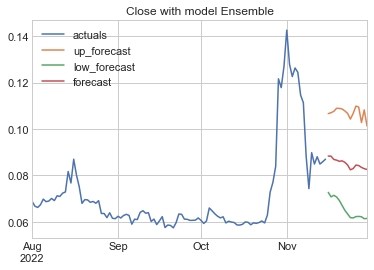

In [14]:
#Gráficaremos una muestra

prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2022-08-01")

In [17]:
forecasts_df = prediction.forecast
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

In [18]:
model_results = model.results()

In [19]:
validation_results = model.results("validation")

In [23]:
validation_results


,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,imle_weighted,spl_weighted,maxe_weighted,oda_weighted,dwae_weighted,mqae_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score
0,00071870b014657e8466b7498fbe1b9d,MetricMotif,"{""window"": 5, ""point_method"": ""weighted_mean"",...","{""fillna"": ""fake_date"", ""transformations"": {""0...",0,1,47.226457,0.041102,0.046215,5.379585,...,0.040075,41.586536,0.080247,0.866667,0.406771,0.033858,0.000000,0.333333,0.04200,612.717616
1,00211daf07f577a7e17c7d5d2df8525f,DatepartRegression,"{""regression_model"": {""model"": ""RandomForest"",...","{""fillna"": ""zero"", ""transformations"": {""0"": ""D...",0,4,13.373615,0.011197,0.014882,2.071694,...,0.011052,3.716218,0.072105,0.466667,0.700588,0.007237,0.850000,0.533333,0.13275,122.451928
2,002225961551a0ecdb6d247d44d7ed1c,LastValueNaive,{},"{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0,1,22.742279,0.022823,0.029933,4.792762,...,0.022391,7.641517,0.057916,0.866667,0.386982,0.016457,0.466667,0.333333,0.00700,223.401116
3,002ab6656d88e0a041e3a0aa2a9a4394,MetricMotif,"{""window"": 10, ""point_method"": ""weighted_mean""...","{""fillna"": ""fake_date"", ""transformations"": {""0...",0,1,34.624994,0.032241,0.038834,4.973888,...,0.031513,13.422623,0.073373,0.866667,0.396612,0.024558,0.000000,0.600000,0.01400,326.015647
4,0038e2dc3d01916dc80209a6d93e5d6a,UnobservedComponents,"{""level"": true, ""maxiter"": 100, ""cov_type"": ""o...","{""fillna"": ""fake_date"", ""transformations"": {""0...",0,1,22.486698,0.024049,0.029411,3.275019,...,0.024041,16.014056,0.051227,0.866667,0.395317,0.019230,0.000000,0.666667,0.26210,285.988046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,ff734d436fb3450c40b0c6724b53d3d3,ARIMA,"{""p"": 0, ""d"": 0, ""q"": 0, ""regression_type"": null}","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,1,40.192267,0.036252,0.041730,5.147306,...,0.035412,8.008457,0.075312,0.866667,0.401434,0.029074,0.533333,0.600000,0.02000,308.128063
1118,ffa459643050a04dab9f98c5f661dee8,MultivariateMotif,"{""window"": 10, ""point_method"": ""weighted_mean""...","{""fillna"": ""mean"", ""transformations"": {""0"": ""A...",0,1,17.550225,0.018354,0.024933,4.399326,...,0.018060,43.852248,0.053927,0.866667,0.381921,0.012302,0.000000,0.666667,0.03300,481.288067
1119,ffb2ccd923908c71adca4655f55a165e,UnivariateRegression,"{""regression_model"": {""model"": ""FastRidge"", ""m...","{""fillna"": ""rolling_mean"", ""transformations"": ...",0,1,15.644699,0.015828,0.019162,3.312040,...,0.015815,4.243782,0.037653,0.866667,0.384420,0.012550,0.933333,0.600000,0.38410,146.833930
1120,ffcb003e16c794fc41cc298b0c3c436c,GLS,{},"{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,18.414469,0.019094,0.020964,4.209893,...,0.018940,8.201420,0.042575,0.866667,0.384586,0.015811,0.000000,0.600000,0.02400,194.678528


In [24]:
forecasts_df

,Close
2022-11-16,0.088316
2022-11-17,0.088285
2022-11-18,0.086858
2022-11-19,0.086565
2022-11-20,0.086064
2022-11-21,0.086264
2022-11-22,0.085627
2022-11-23,0.084464
2022-11-24,0.082393
2022-11-25,0.082943


In [25]:
forecasts_up

,Close
2022-11-16,0.106610
2022-11-17,0.106989
2022-11-18,0.107590
2022-11-19,0.108903
2022-11-20,0.108857
2022-11-21,0.108603
2022-11-22,0.107770
2022-11-23,0.106691
2022-11-24,0.104253
2022-11-25,0.106705


In [26]:
forecasts_low

,Close
2022-11-16,0.072676
2022-11-17,0.070734
2022-11-18,0.071408
2022-11-19,0.070703
2022-11-20,0.069192
2022-11-21,0.067057
2022-11-22,0.064939
2022-11-23,0.063350
2022-11-24,0.061775
2022-11-25,0.061663


<h2> Conclusiones
       

<ol>
        <li> Por medio de la librería AutoTS el modelo se fue entrenando y encontro cual era el que tenia mejores resultados</li>
        <li> Las Criptomonedas son activos digitales que presentan mucha volatilidad y que en su mayoría aumenta o disminuye gracias a la especulaciones  </li>